<a href="https://colab.research.google.com/github/phungthibacha/Python_Data_Analysis_Hospitality_Domain/blob/main/Project_Data_analysis_for_Hospitality_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
%pip install pandas
import pandas as pd
import numpy as np

1. Data Exploration

In [182]:
#Loading the transaction booking dataset into pandas dataframe
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [183]:
#Check number of rows and columns we have for this dataset
df_bookings.shape

(134590, 12)

In [184]:
#How many unique room categories we have:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [185]:
#How many unique booking platforms we have:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [186]:
# how many bookings are made per platform?
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<Axes: >

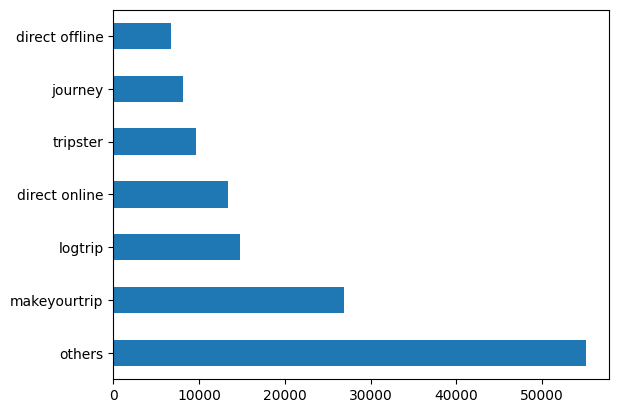

In [187]:
# Using bar chart to illustrate how many bookings are made per platform?
df_bookings.booking_platform.value_counts().plot(kind = 'barh')

In [188]:
# quick statistics for this dataset
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


A quick look from this statistic:
- Minimum number of guest: -17 is not a correct value for this column
- Average rating is 3.6 - we need to improve the average rating to more than 4 to gain good position in market shares


In [189]:
#We want to check the revenue generated value min and max,
# as it seems like they have errors for max value
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [190]:
# Load other data files:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")

In [191]:
# Quick explorations for hotel dataset
df_hotels.shape

(25, 4)

In [192]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [193]:
#How many properties in each property name
df_hotels.property_name.value_counts()

Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: property_name, dtype: int64

In [194]:
#How many properties in each category
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<Axes: >

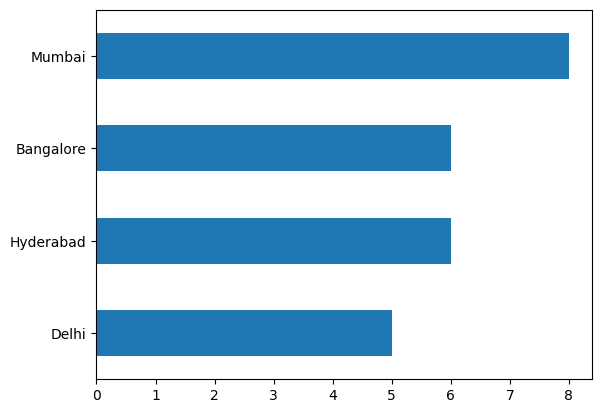

In [195]:
#How many properties in each city
df_hotels.city.value_counts().sort_values().plot(kind='barh')

In [196]:
# Quick explorations for aggregated bookings dataset
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [197]:
#how many rows and columns we have for this dataset
df_agg_bookings.shape

(9200, 5)

In [198]:
#unique property ids in aggregate bookings dataset
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [199]:
#Total bookings per property_id
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [200]:
#Days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [201]:
#Properties that have highest capacity
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


2. Data Cleaning

2.1. Removing outliers

In [202]:
# Cleaning bookings dataset
df_bookings.describe()
#we can observe that, number of guests can't be values smaller than 0

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [203]:
#We have a look of dataset that have number of guest smaller than 0
df_bookings[df_bookings.no_guests <=0]
# we talk to data engineer about this problem to fix this error

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [204]:
df_bookings.shape

(134590, 12)

In [205]:
#and we have quick fix for this error by get rid of these rows as it only accounts for small data rows
df_bookings = df_bookings[df_bookings.no_guests > 0]
df_bookings.shape

(134578, 12)

In [206]:
# revenue generated columns have issues as we observed in data exploration step
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()
# From a single booking transaction, we can't have transaction that high like the max value

(6500, 28560000)

In [207]:
#Using 3 standard deviation to filter out outliers of revenue generated values
avg, std = df_bookings.revenue_generated.mean() , df_bookings.revenue_generated.std()
avg, std

(15378.036937686695, 93040.1549314641)

In [208]:
higher_limit = (avg + 3*std)
higher_limit


294498.50173207896

In [209]:
lower_limit = (avg - 3*std)
lower_limit
# As the revenue generated can't be smaller than 0 so we should not use this lower limit

-263742.4278567056

In [210]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [211]:
# we have a look of outliers of revenue_generated
df_bookings[(df_bookings.revenue_generated > higher_limit)]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [212]:
#We filter out all outliers from revenue generated
df_bookings = df_bookings[(df_bookings.revenue_generated <= higher_limit)]
df_bookings.shape

(134573, 12)

In [213]:
# we check the revenue realized column values
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [214]:
# we perform the standard deviation check of the max value to make sure it corrects
avg, std = df_bookings.revenue_realized.mean(), df_bookings.revenue_realized.std()
high_limit = avg + 3*std
high_limit

33479.358661845814

In [215]:
#we want to make further investigation as the max value not higher than high limit much
df_bookings[df_bookings.revenue_realized>high_limit]
#There are 1299 rows, and all the values are from RT4 room category

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [216]:
# We check RT4 room information
df_rooms
#We are confirmed that RT4 is presidential room - the expensive room type

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [217]:
# we want to get the quick statistic for revenue realized values of RT4 room
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [218]:
#Calculate the real outlier values for RT4 room:
avg, std = df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.mean(), df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.std()
high_limit = avg + 3*std
high_limit
# we can see that the max value for RT4 room is smaller than the high limit value
# we don't have outliers for revenue realized

50585.10567100048

2.2. Handling Na values

In [219]:
#Check null values in dataset
df_bookings.isnull().sum()
#we can observe that:customers not always give rating for their bookings
#so it's ok to leave the na values in rating given column

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [220]:
#Find columns with null values in aggregate_bookings dataset:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [221]:
#capacity has 2 null values, so we need to observe these null values
# to decide what we need to do with these
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [222]:
# Let's have a look of normally capacity for room RT1 and property ID 17561
df_agg_bookings.loc[(df_agg_bookings['room_category']=='RT1') & (df_agg_bookings['property_id']==17561)]
#So the correct value for capacity of room RT1 and property ID 17561 is 26

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
109,17561,2-May-22,RT1,15,26.0
210,17561,3-May-22,RT1,16,26.0
309,17561,4-May-22,RT1,15,26.0
409,17561,5-May-22,RT1,15,26.0
...,...,...,...,...,...
8709,17561,27-Jul-22,RT1,14,26.0
8809,17561,28-Jul-22,RT1,14,26.0
8909,17561,29-Jul-22,RT1,15,26.0
9009,17561,30-Jul-22,RT1,20,26.0


In [223]:
#replace capacity for room RT1, property ID 17561 with value 26
df_agg_bookings.loc[(df_agg_bookings['room_category']=='RT1') & (df_agg_bookings['property_id']==17561), 'capacity'] = 26

In [224]:
# Let's have a look of normally capacity for room RT1 and property ID 17562
df_agg_bookings.loc[(df_agg_bookings['room_category']=='RT1') & (df_agg_bookings['property_id']==17562)]
#So the correct value for capacity of room RT1 and property ID 17562 is 20

,property_id,check_in_date,room_category,successful_bookings,capacity
14,17562,1-May-22,RT1,12,NaN
115,17562,2-May-22,RT1,9,20.0
216,17562,3-May-22,RT1,10,20.0
315,17562,4-May-22,RT1,9,20.0
415,17562,5-May-22,RT1,8,20.0
...,...,...,...,...,...
8715,17562,27-Jul-22,RT1,8,20.0
8815,17562,28-Jul-22,RT1,9,20.0
8915,17562,29-Jul-22,RT1,7,20.0
9015,17562,30-Jul-22,RT1,10,20.0


In [225]:
#replace capacity for room RT1, property ID 17561 with value 20
df_agg_bookings.loc[(df_agg_bookings['room_category']=='RT1') & (df_agg_bookings['property_id']==17562), 'capacity'] = 20

In [226]:
#check capacity value again
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,26.0
14,17562,1-May-22,RT1,12,20.0


In [227]:
#check if any successful booking value greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]
# as this only account for 6 rows in dataset 9200 rows, so we can filter them out

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [228]:
#filter the errors value out
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

3. Data transformation

In [229]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [230]:
#calculate occupancy percentage = successful booking / capacity of that property id
df_agg_bookings['occupancy_pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']
df_agg_bookings['occupancy_pct']

<ipython-input-230-37984feff1c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings['occupancy_pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']


0       0.833333
1       0.933333
2       0.766667
4       0.947368
5       0.700000
          ...   
9195    0.722222
9196    0.722222
9197    0.500000
9198    0.500000
9199    0.750000
Name: occupancy_pct, Length: 9194, dtype: float64

In [231]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [232]:
df_agg_bookings['occupancy_pct'] = df_agg_bookings['occupancy_pct'].apply(lambda x: round(x*100,2))
df_agg_bookings.head()

<ipython-input-232-ebbbdc8af1b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings['occupancy_pct'] = df_agg_bookings['occupancy_pct'].apply(lambda x: round(x*100,2))


,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [233]:
"""
 we can calculate ratio by using function, for example:

df['pe_ratio'] = df.apply(lambda x: x['price']/x['eps'], axis = 1)

or we can do normalization using function such as:

def convert(x):
  if x['currency'] == 'USD':
    return x['price']*80
  return x['price']
df['price_inr'] = df.apply(convert, axis=1)
"""

"\n we can calculate ratio by using function, for example:\n \ndf['pe_ratio'] = df.apply(lambda x: x['price']/x['eps'], axis = 1)\n\nor we can do normalization using function such as:\n\ndef convert(x):\n  if x['currency'] == 'USD':\n    return x['price']*80\n  return x['price']\ndf['price_inr'] = df.apply(convert, axis=1)\n"

4. Insights generation

In [234]:
# 1) What is the average occupancy rate in each of the room categories?
df_agg_bookings.groupby('room_category')['occupancy_pct'].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occupancy_pct, dtype: float64

In [235]:
#we need to get clearer definition of room, so we perform join with rooms dataset
df = pd.merge(df_rooms, df_agg_bookings, left_on='room_id', right_on = 'room_category')
df.head()

,room_id,room_class,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_pct
0,RT1,Standard,16559,1-May-22,RT1,25,30.0,83.33
1,RT1,Standard,19562,1-May-22,RT1,28,30.0,93.33
2,RT1,Standard,19563,1-May-22,RT1,23,30.0,76.67
3,RT1,Standard,16558,1-May-22,RT1,18,19.0,94.74
4,RT1,Standard,17560,1-May-22,RT1,28,40.0,70.00


In [236]:
df.drop('room_category', axis=1, inplace=True)
df.head()

,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,occupancy_pct
0,RT1,Standard,16559,1-May-22,25,30.0,83.33
1,RT1,Standard,19562,1-May-22,28,30.0,93.33
2,RT1,Standard,19563,1-May-22,23,30.0,76.67
3,RT1,Standard,16558,1-May-22,18,19.0,94.74
4,RT1,Standard,17560,1-May-22,28,40.0,70.00


In [237]:
df.groupby('room_class')['occupancy_pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occupancy_pct, dtype: float64

In [238]:
#2) Average occupancy rate per city

In [239]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [240]:
#performing merge of 2 dataset
df = pd.merge(df_hotels, df, on = 'property_id')
df.head()

,property_id,property_name,category,city,room_id,room_class,check_in_date,successful_bookings,capacity,occupancy_pct
0,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,1-May-22,18,19.0,94.74
1,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,2-May-22,12,19.0,63.16
2,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,3-May-22,14,19.0,73.68
3,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,4-May-22,13,19.0,68.42
4,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,5-May-22,12,19.0,63.16


In [241]:
#Average occupancy rate per city
df.groupby('city')['occupancy_pct'].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occupancy_pct, dtype: float64

<Axes: ylabel='city'>

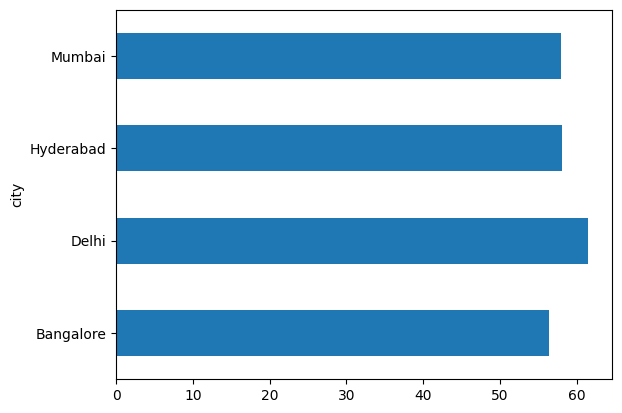

In [242]:
#plotting
df.groupby('city')['occupancy_pct'].mean().round(2).plot(kind='barh')

In [243]:
# 3)when was the occupancy better: Weekday / Weekend?
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [244]:
#performing merge with 2 dataset
df = pd.merge(df_date, df, left_on = 'date', right_on = 'check_in_date')
df.head()

,date,mmm yy,week no,day_type,property_id,property_name,category,city,room_id,room_class,check_in_date,successful_bookings,capacity,occupancy_pct
0,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,10-May-22,10,19.0,52.63
1,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,RT2,Elite,10-May-22,12,22.0,54.55
2,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,RT3,Premium,10-May-22,4,8.0,50.00
3,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,RT4,Presidential,10-May-22,2,3.0,66.67
4,10-May-22,May 22,W 20,weekeday,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,10-May-22,18,30.0,60.00


In [245]:
df.drop('date', axis=1, inplace=True)
df.head()

,mmm yy,week no,day_type,property_id,property_name,category,city,room_id,room_class,check_in_date,successful_bookings,capacity,occupancy_pct
0,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,10-May-22,10,19.0,52.63
1,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,RT2,Elite,10-May-22,12,22.0,54.55
2,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,RT3,Premium,10-May-22,4,8.0,50.00
3,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,RT4,Presidential,10-May-22,2,3.0,66.67
4,May 22,W 20,weekeday,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,10-May-22,18,30.0,60.00


In [246]:
#when was the occupancy better: Weekday / Weekend?
df.groupby('day_type')['occupancy_pct'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occupancy_pct, dtype: float64

In [247]:
# 4)In June, what is the occupancy for different city
#check the month column
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [248]:
#filter dataframe just for month June
df_june_22 = df[df['mmm yy'] == 'Jun 22']
df_june_22.head()

,mmm yy,week no,day_type,property_id,property_name,category,city,room_id,room_class,check_in_date,successful_bookings,capacity,occupancy_pct
2200,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,10-Jun-22,11,19.0,57.89
2201,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,RT2,Elite,10-Jun-22,16,22.0,72.73
2202,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,RT3,Premium,10-Jun-22,6,8.0,75.00
2203,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,RT4,Presidential,10-Jun-22,3,3.0,100.00
2204,Jun 22,W 24,weekeday,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,10-Jun-22,20,30.0,66.67


In [249]:
#In June, what is the occupancy for different city
df_june_22.groupby('city')['occupancy_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occupancy_pct, dtype: float64

In [250]:
#we get new data from august, so we append this new dataset to our dataframe
df_august = pd.read_csv("new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [251]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [252]:
df_august.rename(columns = {'room_category':'room_id', 'occ%':'occupancy_pct'}, inplace = True)

In [253]:
df_august.shape

(7, 13)

In [254]:
df.columns

Index(['mmm yy', 'week no', 'day_type', 'property_id', 'property_name',
       'category', 'city', 'room_id', 'room_class', 'check_in_date',
       'successful_bookings', 'capacity', 'occupancy_pct'],
      dtype='object')

In [255]:
df = df[['property_id', 'property_name', 'category','city','room_id' ,'room_class', 'check_in_date','mmm yy','week no','day_type','successful_bookings','capacity','occupancy_pct']]
df.head()

,property_id,property_name,category,city,room_id,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occupancy_pct
0,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,10-May-22,May 22,W 20,weekeday,10,19.0,52.63
1,16558,Atliq Grands,Luxury,Delhi,RT2,Elite,10-May-22,May 22,W 20,weekeday,12,22.0,54.55
2,16558,Atliq Grands,Luxury,Delhi,RT3,Premium,10-May-22,May 22,W 20,weekeday,4,8.0,50.00
3,16558,Atliq Grands,Luxury,Delhi,RT4,Presidential,10-May-22,May 22,W 20,weekeday,2,3.0,66.67
4,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,10-May-22,May 22,W 20,weekeday,18,30.0,60.00


In [256]:
df.shape

(6497, 13)

In [257]:
#append august transaction to original transaction dataset
#axis = 0: append rows
latest_df = pd.concat([df,df_august], ignore_index = True, axis = 0)
latest_df.head()

,property_id,property_name,category,city,room_id,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occupancy_pct
0,16558,Atliq Grands,Luxury,Delhi,RT1,Standard,10-May-22,May 22,W 20,weekeday,10,19.0,52.63
1,16558,Atliq Grands,Luxury,Delhi,RT2,Elite,10-May-22,May 22,W 20,weekeday,12,22.0,54.55
2,16558,Atliq Grands,Luxury,Delhi,RT3,Premium,10-May-22,May 22,W 20,weekeday,4,8.0,50.00
3,16558,Atliq Grands,Luxury,Delhi,RT4,Presidential,10-May-22,May 22,W 20,weekeday,2,3.0,66.67
4,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,10-May-22,May 22,W 20,weekeday,18,30.0,60.00


In [258]:
# 6) Revenue realized per city
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [259]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [260]:
# we need to join hotels dataset and bookings dataset
df_bookings_all = pd.merge(df_bookings, df_hotels, on = 'property_id')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [261]:
# Revenue realized per city
df_bookings_all.groupby('city')['revenue_realized'].sum().sort_values(ascending = False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

In [262]:
#6) Month by month revenue realized
pd.merge(df_bookings_all ,df_date, left_on = 'check_in_date', right_on = 'date')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [263]:
#there is some errors in data type of date, so we need to check it:
df_bookings_all.info()
#we want check_in_date to be date type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [266]:
df_bookings_all['check_in_date'] = pd.to_datetime(df_bookings_all['check_in_date'])

In [265]:
df_date.info()
#we want date to be date type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [267]:
df_date['date'] = pd.to_datetime(df_date['date'])

In [269]:
#Now we can merge 2 data set properly
df_bookings_all = pd.merge(df_bookings_all ,df_date, left_on = 'check_in_date', right_on = 'date')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [273]:
#month by month revenue
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum().sort_values(ascending = False)

mmm yy
May 22    408375641
Jul 22    389940912
Jun 22    377191229
Name: revenue_realized, dtype: int64

In [275]:
# 7) Revenue realized per hotel type
df_bookings_all.groupby('category')['revenue_realized'].sum().sort_values(ascending=False)

category
Luxury      723557067
Business    451950715
Name: revenue_realized, dtype: int64

In [276]:
# 8) Average rating per city
df_bookings_all.groupby('city')['ratings_given'].mean()

city
Bangalore    3.403911
Delhi        3.775088
Hyderabad    3.664286
Mumbai       3.644350
Name: ratings_given, dtype: float64

<Axes: ylabel='revenue_realized'>

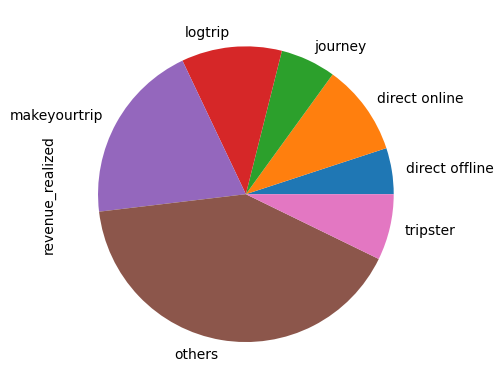

In [278]:
# 9) A pie chart of revenue realized per booking platform
df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie')